In [13]:
from sklearn.datasets import load_wine, load_breast_cancer, load_diabetes
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [4]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [10]:
wine = load_wine()
cancer = load_breast_cancer()
diabetes = load_diabetes()

plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

# Random Forest, Extra Tree

와인

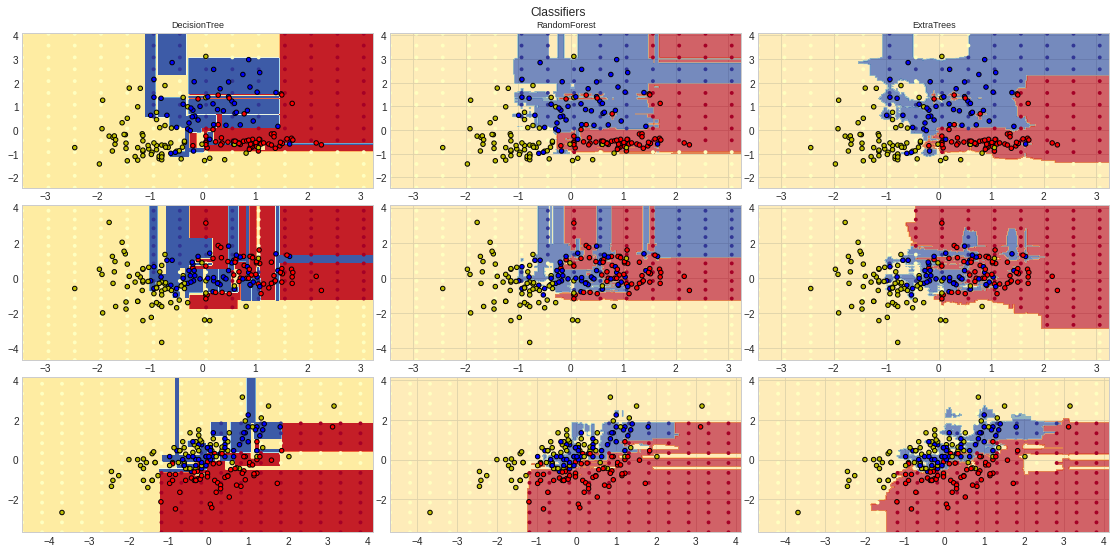

In [6]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:

    X = wine.data[:,pair]
    y = wine.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X,y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step),
                         np.arange(y_min,y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z , cmap= cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z , alpha=estimator_alpha,cmap= cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:,0], X[:,1],c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

유방암

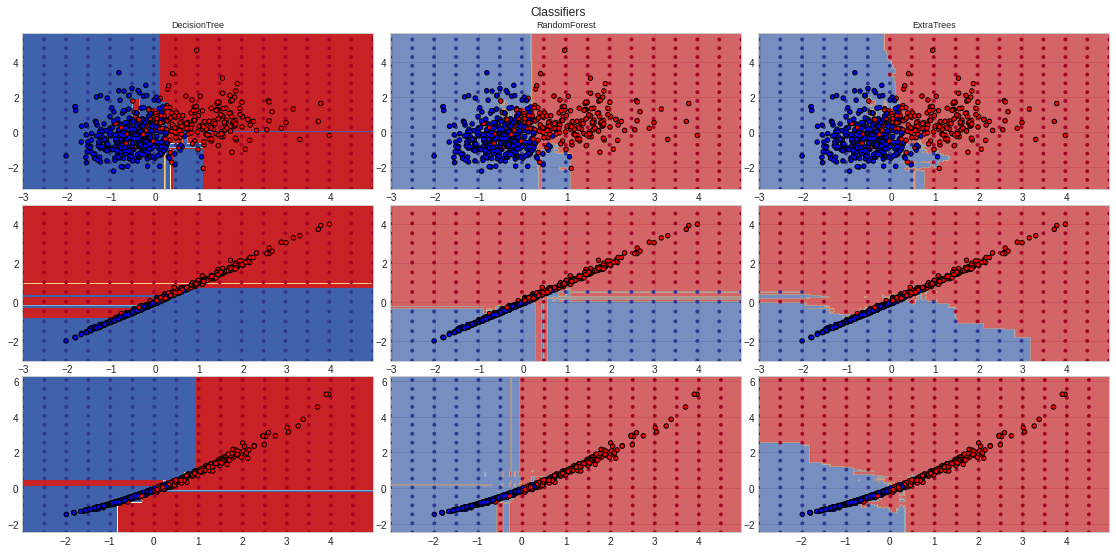

In [9]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:

    X = cancer.data[:,pair]
    y = cancer.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X,y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step),
                         np.arange(y_min,y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z , cmap= cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z , alpha=estimator_alpha,cmap= cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:,0], X[:,1],c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

당뇨병

In [14]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

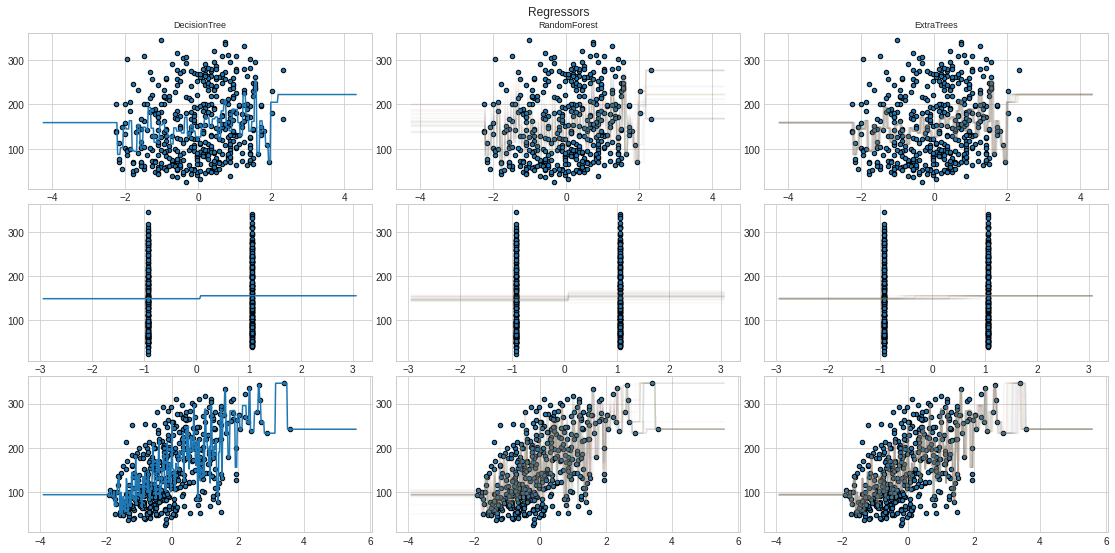

In [15]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):
  for model in models:
    X = diabetes.data[:,pair]
    y = diabetes.target

    
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X.reshape(-1,1),y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1,x_max+1, plot_step), np.arange(y_min-1,y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx,Z , alpha=estimator_alpha)

    plt.scatter(X, y,edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Regressors', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

#Voting 및 Stacking

In [16]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

와인

In [17]:
X = wine.data[:,[0,2]]
y = wine.target

In [18]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=0.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('df',model1),('knn',model2),('svc',model3)],
                              voting='soft',weights=[2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [19]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

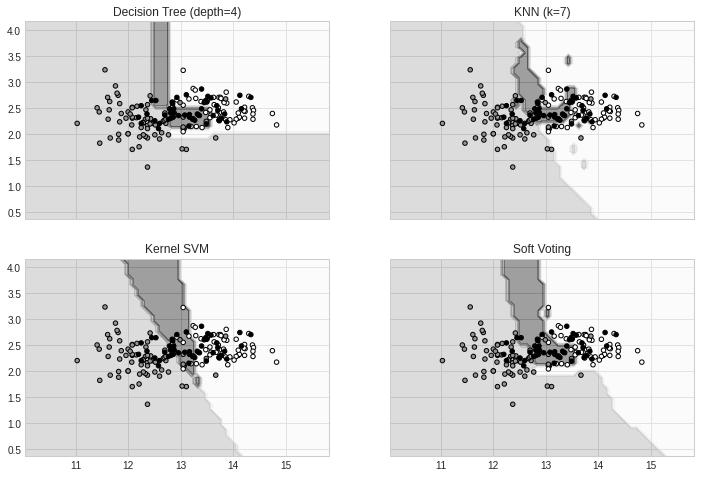

In [20]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM','Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z , alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

유방암

In [67]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier, VotingRegressor

In [35]:
X = cancer.data[:,[0,2]]
y = cancer.target

In [36]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(estimators=estimators,
                           final_estimator=RandomForestClassifier())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [37]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

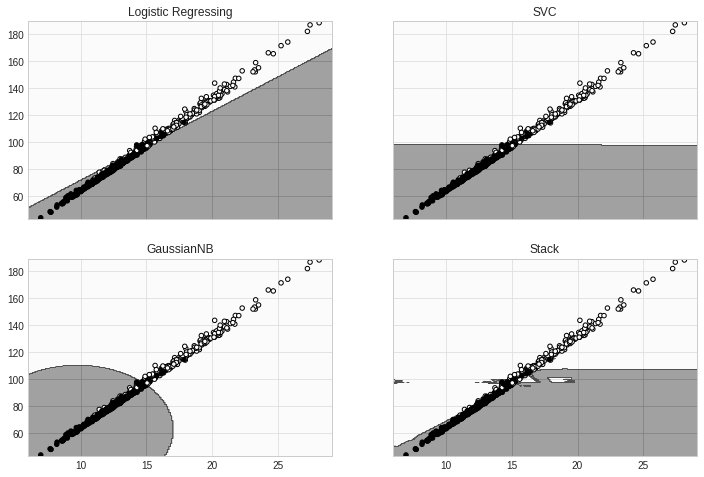

In [38]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regressing', 'SVC',
                           'GaussianNB','Stack']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z , alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

당뇨병

In [74]:
X = diabetes.data[:,0].reshape(-1,1)
y = diabetes.target

In [75]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1,x_max+1, 0.1)

In [76]:
estimators=[('ridge',Ridge()),('lasso',Lasso()),('svr',SVR())]

In [77]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

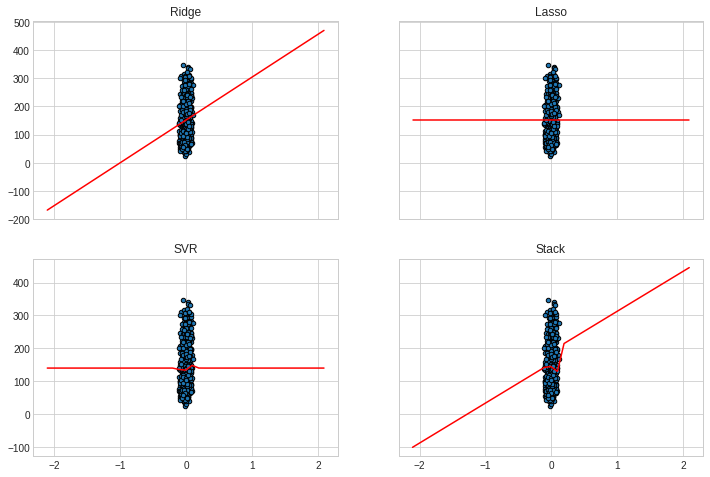

In [78]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso',
                           'SVR','Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z , c='r')
  axarr[idx[0], idx[1]].scatter(X,y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()